# Exploring the damage threshold

For sufficientarian objectives, we need a damage threshold. Figuring out what value is appropriate will happen in this notebook.
---

## 1. Imports
First, we need some imports, and we need to set the current working directory straight.

In [1]:
import numpy as np

from model.pyrice import PyRICE
from model.enumerations import *

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.8)
sns.set_style("whitegrid")

## 2. Setting up model parameters

In [2]:
model_specification = ModelSpec.STANDARD
damage_function = DamageFunction.NORDHAUS
welfare_function = WelfareFunction.UTILITARIAN

model = PyRICE(model_specification=model_specification,
               damage_function=damage_function,
               welfare_function=welfare_function)

sr = 0.248
miu = 2135
irstp_consumption = 0.015

## 3. Visualizations of several damage-thresholds

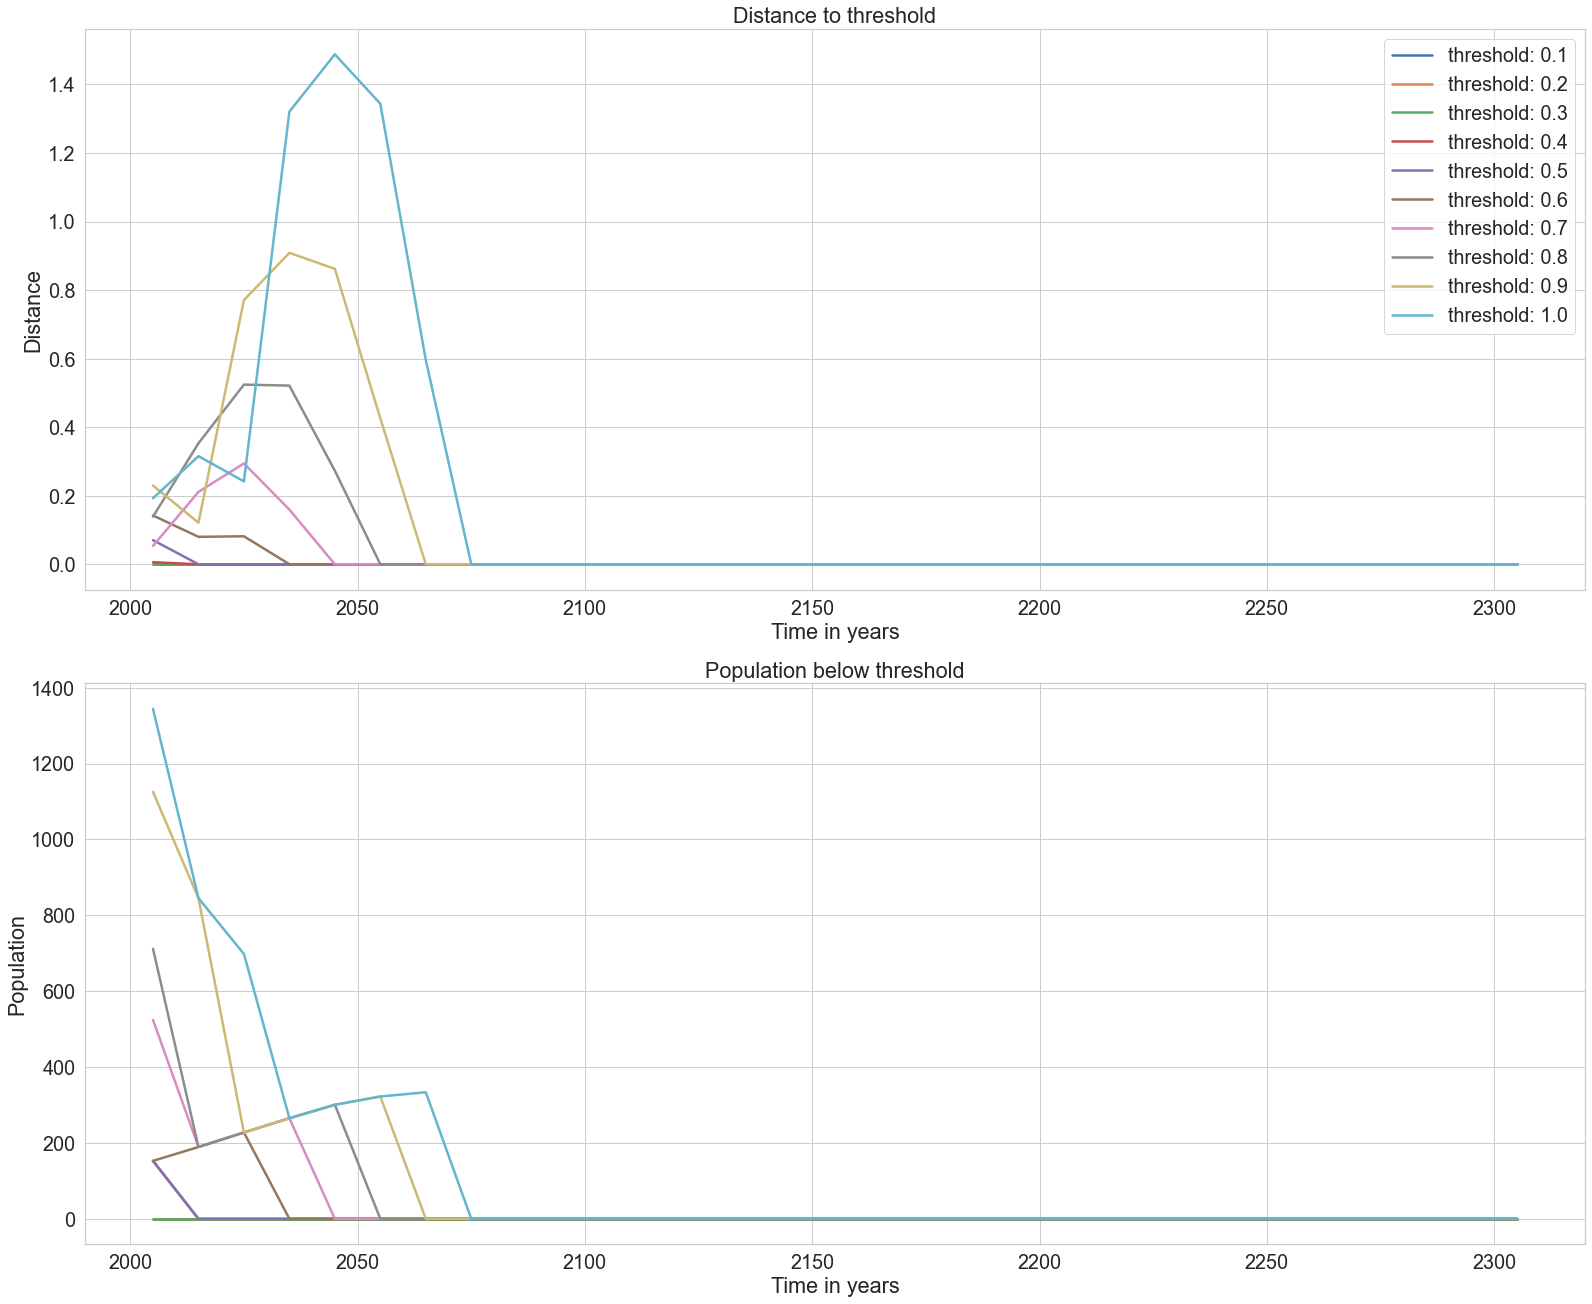

In [3]:
mosaic = """
    AA
    BB
    """

line_with = 2.5
fig = plt.figure(constrained_layout=True, figsize=(22, 18))
ax_dict = fig.subplot_mosaic(mosaic)

values = np.arange(0.1, 1.1, 0.1)

for threshold in values:

    threshold = round(threshold, 1)
    results = model(sr=sr, miu=miu, irstp_consumption=irstp_consumption, ini_suf_threshold_damage=threshold)
    results_formatted = model.get_better_formatted_results()

    ax_dict["A"].plot(results_formatted.df_main.loc[:, 'Distance to damage threshold'], label=f'threshold: {threshold}', linewidth=line_with)
    ax_dict["A"].set_title('Distance to threshold')
    ax_dict["A"].set_xlabel('Time in years')
    ax_dict["A"].set_ylabel('Distance')

    ax_dict["B"].plot(results_formatted.df_main.loc[:, 'Population below damage threshold'], label=f'threshold: {threshold}', linewidth=line_with)
    ax_dict["B"].set_title('Population below threshold')
    ax_dict["B"].set_xlabel('Time in years')
    ax_dict["B"].set_ylabel('Population')

# Remove duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()